## **Decision Tree Regression Notes**


**Intuition**

* [Decision Tree](https://gdcoder.com/decision-tree-regressor-explained-in-depth/) regression is a type of predictive model that utilises recursive splitting to make decisions based on particular binary conditions, using mean squared error (sometimes mean absolute error, though this is less common) as a metric find the optimal splits for particular nodes
* Because of this, decision tree regression can handle data that is non-linear in nature
* The decision tree has a root node (at the top of the tree), internal nodes (arrows pointing too them and away from them) and leaf nodes (aka terminal nodes, which only have arrows pointing to them)
* Features don't need to be scaled unlike previously seen algorithms such as Ridge, Lasso and ElasticNet

**The Algorithm**

----

* The genreal idea of decision tree regression is that we want to divide the feature space, that is, the set of all possible values for $X_1, X_2, ...X_p$ into a total of $J$ distinct and non-overlapping regions $R_1, R_2, ..., R_J$
* If multiple observations fall into a single region $R_j$ that represents a leaf node, the model prediction will simply be the mean of all the training observations in $R_j$
* These regions that divide the predictor space are comprised of high dimensional rectangles, or boxes, to allow for easy model interpretation
* Ultimately, the goal behind decision tree regression is to find the boxes $R_1, R_2, ..., R_J$ that minimises the residual sum of squares, given by 

$$\sum_{j=1}^{J}\sum_{i \in R_j}(y_i - \hat{y}_{R_j})^2$$

in which the $\hat{y}_{R_j}$ term is the mean of all the observations that fall into the $j^{th}$ box

* To begin the process of recursive binary splitting, sweeping through all possible predictors $X_1, X_2, ..., X_p$ in our predictor space, for each $X_j$ we aim to find a vertical line 
cutoff point $x = s$ such that segementing the predictor space in to two regions $\{X|X_j < s\}$ and $\{X|X_j \geq s\}$ results in the largest possible reduction in the residual sum of squares. These all become candidates for the root node 
* The predictor and cutoff combination $X_j$ and $x=s$ that results in the lowest residual sum of squares is what then gets chosen as the root node
* To determine the remaining nodes, we keep on prioritising the features and $x=s$ cutoff value thresholds that minimise mean squared error, given previous conditions from the nodes above it are still true
* Once we have reached a leaf node, the output is just the average of all the data points at that particular leaf node
* Once we have built our tree, we can run a new observation down our tree get an output value, formally represented as

$$f(X) = \sum_{m=1}^M c_m 1_{(X \in R_m)}$$

whereby we segement our feature space into regions $R_1, ...R_M$ and make a prediction based of what leaf node our observation went to 

---
#### <u>Hyperparameters for Decision Tree Models</u>

* To find the ideal tree that aims to have low bias and low variance we can use cross validation techniques such as grid search and randomised search built into the Scikit-Learn library 
* Here we can try many hyperparameter combos and choose the one that had the best cross validated $R^2$ score. We can go for other metrics too.
* Some hyperparameters have been listed below:

**min_samples_split**
* The `min_samples_split` hyperparameter tells our decision tree model how many samples we need (minimum) if we want to make another split to any of the internal nodes of the tree
* For instance, if we set this parameter to 10, but a split results in 3 observations being assigned to a particular value, it then becomes a leaf node.

**min_samples_leaf**
* In tree models, the leaf node (terminal node) is the node where there are no arrows pointing away from it. No further splitting can be done
* In other words, it is the base of the tree that makes the final decision about an observation in our data
* So this parameter tells the model how many observations in a particular leaf node we would like to have as a minimum. 
* For example, setting this parameter to 5 would mean that we can't have a situation where only 2 observations are part of a particular leaf node
* Though it must be noted that sometimes the rules set on `min_samples_split` and `min_samples_leaf` can't both be adhered to. 
* For instance if we set the `min_samples_split` parameter to 10, we are telling our model that we need at least 10 samples to potentially do another split
* But if we have say 11 observations at an internal node and then set `min_samples_leaf` to 8, a (7 and 4) or a (6 and 5) split would violate the rules we placed on `min_samples_leaf`.
* So while we had enough samples to make the split, there are insuffient amounts of observations at a leaf node
* In these situations, the split will not be performed

**max_depth**
* The `max_depth` parameter is a hyperparameter that allows us to determine how deep we want our tree to be
* If we create a very large and complex tree that very deep, we are likely to get excellent results on the training set
* However, the model will have a hard time generalising on out of sample data, and will likely perform poorly on the testing set as it has learned too much of the noise that exists in the training data, without adequately capturing the signal component of the model
* This results in a model that is overfit to the training data, which is ultimately one of the drawbacks of decision trees
* Though it is important to also consider the case where the tree isn't deep enough and isn't given the opportunity to recognise the relationships in the data 
* This results in the model being underfit, that is, poor training accuracy and poor testing accuracy where both high bias and variance is present
* If we want to display our tree and interpret it, we would opt for a lower `max_depth`

**max_features**
* This represents how many predictor variables we would like to take into account when making decisions on particular nodes (e.g. selecting a root node)
* We can use the square root of the number of features, the log in base 2 or just the total number of features. Fractions can be done too
* Randomly selecting features (ie not using all of them at once) forms a large part of random forest models, which I'll go into after first fitting a decision tree model to the data

**criterion**
* The `criterion` hyperparameter in decision tree regression models is the metric we want our regressor to use when determining our nodes
* Popular options include mean squared error, where nodes are created based off what minimises take the average of the sum of squared residuals 
* Mean absolute error is also sometimes used, and is where we make decisions based off what minimises the average of the sum of absolute value residual distances




In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

# Personal display settings
#===========================

# Suppress scientific notation
np.set_printoptions(suppress=True)

# Get dataset values showing only 2dp
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', None)

# For clear plots with a nice background
plt.style.use('seaborn-whitegrid') 
%matplotlib inline

%load_ext autoreload
%autoreload 2

# python files
import data_prep
import helper_funcs

In [2]:
train = pd.read_csv('../datasets/train_updated.csv')
test = pd.read_csv('../datasets/test_updated.csv')

# Split data
to_drop = ['Country', 'HDI', 'Life_exp']

X_train = train.drop(to_drop, axis='columns')
X_test = test.drop(to_drop, axis='columns')

y_train = train['Life_exp']
y_test = test['Life_exp']

In [3]:
pipe = data_prep.create_pipeline(DecisionTreeRegressor())
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('identity',
                                                                   FunctionTransformer())]),
                                                  ['GDP_cap']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Status'])])),
                ('imputation', KNNImputer()),
                ('model', DecisionTreeRegressor())])

In [4]:
# This will find the best hyperparameters for our model based off the cross validated accuracy score
param_grid = {
    'imputation__n_neighbors': np.arange(3, 21, 2), 
    'imputation__weights': ['uniform', 'distance'],  
    'model__min_samples_split': np.arange(10, 40, 1),
    'model__min_samples_leaf': np.arange(3, 30, 1),
    'model__max_depth': np.arange(3, 12, 1),
    'model__criterion': ["mse", "absolute_error"] 
}

tuned_model = data_prep.randomised_search_wrapper(X_train,
                                                  y_train,
                                                  pipe, 
                                                  param_grid, 
                                                  cv=10,
                                                  n_iter=50)

Best Parameters were...
model__min_samples_split had optimal value as: 15
model__min_samples_leaf had optimal value as: 6
model__max_depth had optimal value as: 10
model__criterion had optimal value as: absolute_error
imputation__weights had optimal value as: uniform
imputation__n_neighbors had optimal value as: 9

The fitted model just initialised now has all these parameters set up


In [5]:
r2, mse, rmse, mae = helper_funcs.display_regression_metrics(y_test, tuned_model.predict(X_test))

All metrics are in terms of the unseen test set

R^2 = 0.9589578625031145
Mean Squared Error = 3.3250700414697443
Root Mean Squared Error = 1.8234774584484845
Mean Absolute Error = 1.2573949156159419


* This decision tree regression model has returned the lowest MSE out of all the models so far (OLS, Ridge, Lasso), and has outperformed all the aforementioned linear models based of $R^2$
* Decision trees don't require the Gauss-Markov assumptions or classical linear model assumptions to be adhered too since decision tree regression is a non-parametric supervised learning algorithm, and this is nice since we have an interpretable model that has still performed well on out of sample data (and makes no assumptions about the underlying distribution of the data)
* While decision trees are notorious for being a low bias and high variance model (that overfits to the training data), the coefficient of determination $R^2$ on the testing set was high, so our tree model was able to predict out of sample data well, made possible through cross validation (through a randomised search) which encouraged the model to generalise better.
* Though perhaps the biggest disadvantage of the decision trees is the fact that [they can't extrapolate](http://freerangestats.info/blog/2016/12/10/extrapolation) the same way that linear models or a neural network can. 

### Save piepline for future use

In [6]:
joblib.dump(tuned_model, './saved_models/Decision Tree Regression.joblib')

['./saved_models/Decision Tree Regression.joblib']

### Get feature importance scores

In [7]:
saved_pipeline = joblib.load('./saved_models/Decision Tree Regression.joblib')

In [8]:
saved_pipeline['preprocessor'].transformers_

[('numeric',
  Pipeline(steps=[('identity', FunctionTransformer())]),
  ['GDP_cap']),
 ('categorical',
  Pipeline(steps=[('ohe', OneHotEncoder(drop='first'))]),
  ['Status']),
 ('remainder', 'passthrough', [0, 1, 2, 4, 6, 7])]

Based off the output above, I'm assuming that the order of the features after the pipeline was fit is:

* GDP_cap (index 3): Used in `FunctionTransformer()`
* Status (index 5): Used in `OneHotEncoder()`

Then all the columns that were under `remainder='passthrough'`, in this order:
* Year 
* InfantMortality
* Health_exp
* Employment
* MeanSchooling
* ElectricityAccess

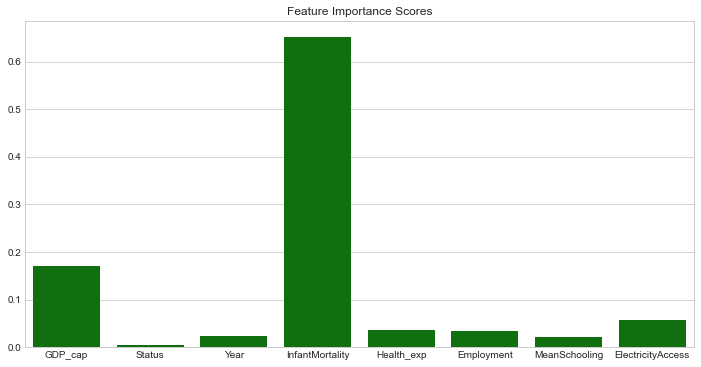

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))

features = X_train.columns[[3, 5, 0, 1, 2, 4, 6, 7]]
importances = saved_pipeline.named_steps['model'].feature_importances_

sns.barplot(x=features, y=importances, color='green')
ax.set(title='Feature Importance Scores');

### Make a prediction

- Year 2036
- Infant Mortality of 2.99
- 40% of GDP is spent on health in 2050
- GDP per capita is 84,991
- Employment to population ration (age 15+) is 70.41%
- Developed Country
- Average years of schooling is 11.89
- 99.99% of the population has access to electricity

In [10]:
saved_pipeline = joblib.load('./saved_models/Decision Tree Regression.joblib')
input_data = [2036, 2.99, 40, 84991, 70.41, 'Developed', 11.89, 99.99]

print(f"Predicted life expectancy (using decision tree regression) = {helper_funcs.make_prediction(input_data, saved_pipeline, X_test)}")

Predicted life expectancy (using decision tree regression) = 78.64146341
